# Machine-Learning

## Objetivo

O objetivo deste trabalho é avaliar a base de dados *"Boston House Prices"* utilizando o algoritmo de seleção de variáveis LASSO e comparar o resultado com o modelo tradicional de regressão linear.

## Carga inicial

Será utilizada a biblioteca [scikit-learn](http://scikit-learn.org/) para o trabalho.

A partir da biblioteca, é possível carregar diretamente os dados que serão utilizados. Esses dados serão carregados em um DataFrame para facilitar a visualização e a manipulação.

In [1]:
from sklearn.datasets import load_boston

boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
print(boston)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [2]:
import pandas as pd #importa biblioteca de dados

boston_df = pd.DataFrame(boston.data) #carrega os dados para o dataframe
boston_df.columns = boston.feature_names
boston_df['Price'] = boston.target #altera o título da target no dataframe para Price

pd.options.display.float_format = '{:,.3g}'.format # Just Format!
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18,2.31,0,0.538,6.58,65.2,4.09,1,296,15.3,397,4.98,24
1,0.0273,0,7.07,0,0.469,6.42,78.9,4.97,2,242,17.8,397,9.14,21.6
2,0.0273,0,7.07,0,0.469,7.18,61.1,4.97,2,242,17.8,393,4.03,34.7
3,0.0324,0,2.18,0,0.458,7,45.8,6.06,3,222,18.7,395,2.94,33.4
4,0.0691,0,2.18,0,0.458,7.15,54.2,6.06,3,222,18.7,397,5.33,36.2


## Regressão Linear

A regressão linear será realizada utilizando o método dos mínimos quadrados.
Apresentamos abaixo os coeficientes calculados.

In [4]:
from sklearn.linear_model import LinearRegression #importa o modelo de regressão linear
import numpy as np #biblioteca que trabalha com vetores e algebra linear

lr = LinearRegression() #associa a variável ao modelo

_x = boston_df.drop('Price', axis=1) #atribui a variável _x as colunas do dataframe exceto o Price
y = boston_df['Price']  #atribui a variavel y a target Price

# Normalization
mu = np.mean(_x, axis=0) #média
sigma = np.std(_x, axis=0) #desvio padrão
x = (_x - mu) / sigma #fórmula normalizando cada registro
print(x)


      CRIM     ZN  INDUS   CHAS    NOX  ...    RAD    TAX  PTRATIO     B  LSTAT
0    -0.42  0.285  -1.29 -0.273 -0.144  ... -0.983 -0.667    -1.46 0.441  -1.08
1   -0.417 -0.488 -0.593 -0.273  -0.74  ... -0.868 -0.987   -0.303 0.441 -0.492
2   -0.417 -0.488 -0.593 -0.273  -0.74  ... -0.868 -0.987   -0.303 0.396  -1.21
3   -0.417 -0.488  -1.31 -0.273 -0.835  ... -0.753  -1.11    0.113 0.416  -1.36
4   -0.412 -0.488  -1.31 -0.273 -0.835  ... -0.753  -1.11    0.113 0.441  -1.03
..     ...    ...    ...    ...    ...  ...    ...    ...      ...   ...    ...
501 -0.413 -0.488  0.116 -0.273  0.158  ... -0.983 -0.803     1.18 0.387 -0.418
502 -0.415 -0.488  0.116 -0.273  0.158  ... -0.983 -0.803     1.18 0.441 -0.501
503 -0.413 -0.488  0.116 -0.273  0.158  ... -0.983 -0.803     1.18 0.441 -0.983
504 -0.408 -0.488  0.116 -0.273  0.158  ... -0.983 -0.803     1.18 0.403 -0.865
505 -0.415 -0.488  0.116 -0.273  0.158  ... -0.983 -0.803     1.18 0.441 -0.669

[506 rows x 13 columns]


In [5]:
#executa o modelo de regrassão linear 

lr.fit(x, y) #realiza o treinamento

coef_df = pd.DataFrame(index=np.append(['Intercept'], boston.feature_names))
coef_df['Regressão Linear'] = np.append([lr.intercept_], lr.coef_) 
coef_df.T


,Intercept,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
Regressão Linear,22.5,-0.928,1.08,0.141,0.682,-2.06,2.67,0.0195,-3.1,2.66,-2.08,-2.06,0.849,-3.74


Apresentamos abaixo a média do quadrado dos resídudos, o coeficiente de determinação $R^2$ ...

In [7]:
from sklearn.metrics import mean_squared_error, r2_score

mse_ls = mean_squared_error(y, lr.predict(x)) #calcular o MSE com o valor predito de x

r2_ls = r2_score(y, lr.predict(x)) #calcular o r^2 do valor predito de x

result_df = pd.DataFrame(index=['MSE', 'R\u00b2'])
result_df['Regressão Linear'] = [mse_ls, r2_ls]
result_df

,Regressão Linear
MSE,21.9
R²,0.741


... e o gráfico com a diferença entre o preço real e o calculado.

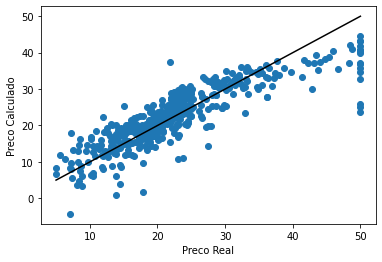

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

def scatterPlot(actual, predicted):
    plt.scatter(actual, predicted)
    range = [actual.min(), actual.max()]
    plt.plot(range, range, 'black')
    plt.xlabel("Preco Real")
    plt.ylabel("Preco Calculado")
    plt.show()
    
scatterPlot(y, lr.predict(x))

In [9]:
from sklearn.model_selection import cross_val_score # Cross Validation Function.
from sklearn.model_selection import KFold # KFold Class.

model  = LinearRegression() #atribui a variável model o modelo de regressão linear
kfold  = KFold(n_splits=5, shuffle=True) # configura o parâmetro do Kfold em 5 partições e embaralha os dados ( shuffle=True)


result = cross_val_score(model, x, y, cv = kfold) #executa  o cross validation nos dados.

print("K-Fold (R^2) Scores: {0}".format(result))
print("Mean R^2 for Cross-Validation K-Fold: {0}".format(result.mean()))
#result_df['OLS - Cross'] = #]
#result_df

K-Fold (R^2) Scores: [0.79932039 0.69975244 0.69149169 0.76440778 0.65242214]
Mean R^2 for Cross-Validation K-Fold: 0.7214788893845677


## Validação Cruzada

É possível verificar no gráfico acima que, para os preços mais altos, o modelo não representou bem os dados.

Faremos uma validação cruzada para verificar esse comportamento. Os dados serão divididos em 5 grupos.

É possível verificar que o $R^2$ foi baixo para os dois últimos grupos.

## Regressão LASSO

Utilizaremos a técnica *Least Absolute Shrinkage and Selection Operator - LASSO* para selecionar as variáveis explicativas utilizando um parâmetro de regularização $\alpha = 0.13$.

In [10]:
from sklearn.linear_model import Lasso #implementa a regressão linear com a possibilidade de ajuste lasso

alpha_lasso = 0.13

las = Lasso(alpha=alpha_lasso)
las.fit(x, y)

mse_lasso = mean_squared_error(y, las.predict(x)) #calcula o mse
r2_lasso = r2_score(y, las.predict(x)) #calcula o predict

result_df['LASSO'] = [mse_lasso, r2_lasso]
result_df

,Regressão Linear,LASSO
MSE,21.9,22.7
R²,0.741,0.732


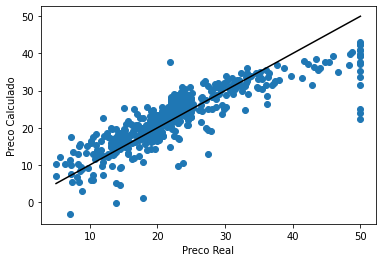

In [11]:
scatterPlot(y, las.predict(x))

## Comparação dos coeficientes

Abaixo podemos verificar que, ao penalizar os estimadores com um $\alpha > 0$, quase todos os coeficientes ficaram com valores menores em módulo. O coeficiente de *AGE* ficou igual a 0, ou seja, o algoritmo eliminou um parâmetro da regressão.

In [12]:
coef_df['LASSO'] = np.append([las.intercept_], las.coef_) 
coef_df.T

,Intercept,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
Regressão Linear,22.5,-0.928,1.08,0.141,0.682,-2.06,2.67,0.0195,-3.1,2.66,-2.08,-2.06,0.849,-3.74
LASSO,22.5,-0.544,0.597,-0.0379,0.65,-1.43,2.87,-0,-2.21,0.758,-0.48,-1.88,0.736,-3.72


## Validação Cruzada - LASSO

Faremos também um teste de validação cruzada, dividindo os dados em 5 grupos.

É possível verificar que o $R^2$ continua baixo para os dois últimos grupos, porém o $R^2$ geral da validação cruzada foi maior que o da validação cruzada no método de mínimos quadrados ordinários.

Concluímos que, apesar de termos um ajuste pior da amostra de treino utilizando LASSO, o modelo se comporta melhor nos dados fora da amostra.

## Caminho LASSO

Com a visualização do *LASSO Path*, podemos ver o comportamento de cada coeficiente da regressão de acordo com a variação do parâmetro de regularização $\alpha$.

Quando $\alpha$ é muito grande, a penalização é significativa e todos os coeficientes ficam muito próximos de 0. A medida que o $\alpha$ tende a 0, os coeficientes se estabilizam e tendem aos valores calculados pelo método dos mínimos quadrados ordinários.

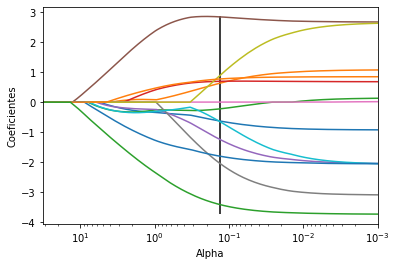

In [ ]:
las = Lasso()
alphas = np.logspace(-3, 1.5, 1000)
alphas, coefs, _ = las.path(x, y, alphas=alphas)

fig, ax = plt.subplots()
ax.plot(alphas, coefs.T)
ax.set_xscale('log')
ax.set_xlim(alphas.max(), alphas.min())
plt.vlines(alpha, coefs.min(), coefs.max())
plt.xlabel("Alpha")
plt.ylabel("Coeficientes")

plt.show()

## Regressão com termos de segunda ordem

Repetiremos as regressões adicionando o quadrado das variáveis explicativas ao modelo. Vamos verificar se o modelo de segunda ordem pode predizer melhor o preço dos imóveis.

In [13]:
#calculo da regressão linear com as variaveis de 2 ordem.

col2 = ['{0}\u00b2'.format(c) for c in list(x.columns)]
df2 = x.copy()**2 #cria uma variável copia de x e eleva ao quadrado
df2.columns = col2

x2 = pd.concat([x, df2], axis=1)

lr = LinearRegression() #xei O Modelo de regressão
lr.fit(x2, y) # executa o modelo de regressão

coef_df_2 = pd.DataFrame(index=np.append(['Intercept'], x2.columns))
coef_df_2['Regressão Linear  X\u00b2'] = np.append([lr.intercept_], lr.coef_) 
coef_df_2

,Regressão Linear X²
Intercept,18.7
CRIM,-3.03
ZN,-0.983
INDUS,0.0238
CHAS,0.0534
NOX,-2.61
RM,1.9
AGE,0.0657
DIS,-3.24
RAD,3.84


In [14]:
mse_ls = mean_squared_error(y, lr.predict(x2))
r2_ls = r2_score(y, lr.predict(x2))

result_df['Regressão Linear X\u00b2'] = [mse_ls, r2_ls]
result_df

,Regressão Linear,LASSO,Regressão Linear X²
MSE,21.9,22.7,14.2
R²,0.741,0.732,0.831


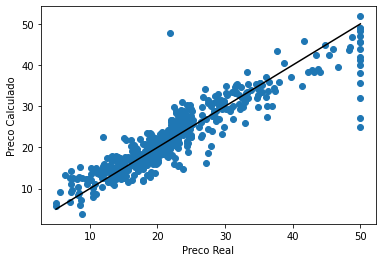

In [15]:
scatterPlot(y, lr.predict(x2))

Conforme esperado, vemos que o modelo de segunda ordem se encaixa melhor. Porém, faremos mais a frente a validação cruzada para verificar se não está ocorrendo *overfitting*.

## Regressão LASSO com termos de segunda ordem

Dessa vez escolhemos um valor maior para $\alpha$, visto que há agora um maior número de variáveis a serem eliminadas pelo modelo.

Observamos um maior número de coeficientes iguais a 0.

In [16]:
alpha = 0.15

las = Lasso(alpha=alpha)
las.fit(x2, y)

coef_df_2['LASSO X\u00b2'] = np.append([las.intercept_], las.coef_) 
coef_df_2

,Regressão Linear X²,LASSO X²
Intercept,18.7,20.8
CRIM,-3.03,-0.337
ZN,-0.983,0
INDUS,0.0238,-0
CHAS,0.0534,0
NOX,-2.61,-0.0123
RM,1.9,2.18
AGE,0.0657,-0
DIS,-3.24,-0.91
RAD,3.84,0


In [17]:
mse_lasso = mean_squared_error(y, las.predict(x2))
r2_lasso = r2_score(y, las.predict(x2))

result_df['LASSO X\u00b2'] = [mse_lasso, r2_lasso]
result_df

,Regressão Linear,LASSO,Regressão Linear X²,LASSO X²
MSE,21.9,22.7,14.2,15.9
R²,0.741,0.732,0.831,0.811


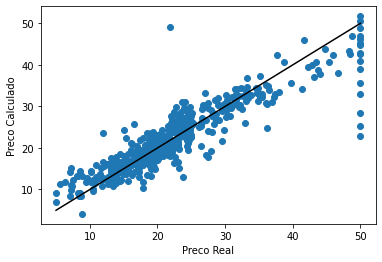

In [18]:
scatterPlot(y, las.predict(x2))